<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/CIFARdATASETSavingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
x_train=x_train[:10000]
y_train=y_train[:10000]
x_test=x_test[:10000]
y_test=y_test[:10000]


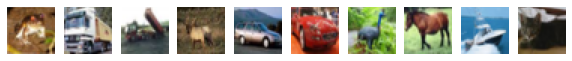

In [ ]:
import matplotlib.pyplot as plt
fix,ax=plt.subplots(1,10,figsize=(10,1))
for i in range(10):
  ax[i].set_axis_off()
  ax[i].imshow(x_train[i])

In [ ]:
def get_test_accuracy(model,x_test,y_test):
  test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=0)
  print('accuracy=', test_acc)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten,MaxPooling2D
def get_new_model():
  model=Sequential([Conv2D(16,activation='relu', input_shape=(32,32,3),kernel_size=(3,3),name='conv_1'),
                    Conv2D(8,activation='relu', kernel_size=(3,3), name='conv_2'),
                    MaxPooling2D(pool_size=(4,4),name='pool_1'),
                    Flatten(name='flatten'),
                    Dense(32,activation='relu',name='dense_1'),
                    Dense(10,activation='softmax',name='dense_2')])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=get_new_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14,514
Trainable params: 14,514
Non-trai

In [ ]:
get_test_accuracy(model,x_test,y_test)

accuracy= 0.09160000085830688


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [75]:
checkpoint_path='model_checkpoints/checkpoint'
checkpoint=ModelCheckpoint(filepath=checkpoint_path,frequency='epoch', save_weights_only=True,verbose=1)

In [ ]:
model.fit(x=x_train,y=y_train,epochs=3,callbacks=[checkpoint])

Epoch 1/3
312/313 [============================>.] - ETA: 0s - loss: 2.0433 - accuracy: 0.2520
Epoch 1: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 11s 34ms/step - loss: 2.0423 - accuracy: 0.2523
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.6005 - accuracy: 0.4233
Epoch 2: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 11s 36ms/step - loss: 1.6001 - accuracy: 0.4233
Epoch 3/3
312/313 [============================>.] - ETA: 0s - loss: 1.4775 - accuracy: 0.4756
Epoch 3: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 12s 37ms/step - loss: 1.4780 - accuracy: 0.4755


In [ ]:
!ls -lh model_checkpoints

total 184K
-rw-r--r-- 1 root root   77 Feb  7 23:07 checkpoint
-rw-r--r-- 1 root root 174K Feb  7 23:07 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  7 23:07 checkpoint.index


In [ ]:
get_test_accuracy(model,x_test,y_test)

accuracy= 0.4778999984264374


In [ ]:
model=get_new_model()
get_test_accuracy(model,x_test,y_test)

accuracy= 0.11209999769926071


In [ ]:
model.load_weights(checkpoint_path)
get_test_accuracy(model,x_test,y_test)

accuracy= 0.4778999984264374


Model Saving criteria

In [ ]:
checkpoint_5000_path=\
'model_checkpoints_5000/checkpoint'
checkpoint_5000=ModelCheckpoint(filepath=checkpoint_5000_path, save_weights_only=True,save_freq=50)

In [ ]:
model=get_new_model()
model.fit(x=x_train,y=y_train,epochs=3,validation_data=(x_test,y_test),batch_size=10,callbacks=[checkpoint_5000])

Epoch 1/3
1000/1000 [==============================] - 21s 20ms/step - loss: 1.8672 - accuracy: 0.3208 - val_loss: 1.5915 - val_accuracy: 0.4262
Epoch 2/3
1000/1000 [==============================] - 19s 19ms/step - loss: 1.5215 - accuracy: 0.4485 - val_loss: 1.5009 - val_accuracy: 0.4665
Epoch 3/3
1000/1000 [==============================] - 19s 19ms/step - loss: 1.3972 - accuracy: 0.4975 - val_loss: 1.4085 - val_accuracy: 0.4999


In [ ]:
!ls -lh model_checkpoints_5000

total 4.3M
-rw-r--r-- 1 root root   77 Feb  8 00:43 checkpoint
-rw-r--r-- 1 root root 174K Feb  8 00:42 checkpoint_01_0050.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  8 00:42 checkpoint_01_0050.index
-rw-r--r-- 1 root root 174K Feb  8 00:42 checkpoint_01_0100.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  8 00:42 checkpoint_01_0100.index
-rw-r--r-- 1 root root 174K Feb  8 00:42 checkpoint_01_0150.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  8 00:42 checkpoint_01_0150.index
-rw-r--r-- 1 root root 174K Feb  8 00:42 checkpoint_01_0200.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  8 00:42 checkpoint_01_0200.index
-rw-r--r-- 1 root root 174K Feb  8 00:42 checkpoint_01_0250.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  8 00:42 checkpoint_01_0250.index
-rw-r--r-- 1 root root 174K Feb  8 00:42 checkpoint_01_0300.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  8 00:42 checkpoint_01_0300.index
-rw-r--r-- 1 root root 174K Feb  8 00:42 checkpoint_01_0350.d

In [ ]:
x_train=x_train[:100]
y_train=y_train[:100]
x_test=x_test[:100]
y_test=y_test[:100]

In [ ]:
model3=get_new_model()

In [ ]:
checkpoint_best_path='model_checkpoint_best/checkpoint'
checkpoint_best=ModelCheckpoint(filepath=checkpoint_best_path, save_weights_only=True,save_freq='epoch', monitor='val_accuracy',save_best_only=True,verbose=1 )

In [72]:
history=model3.fit(x=x_train,y=y_train,epochs=50,validation_data=(x_test,y_test), batch_size=10, callbacks=[checkpoint_best],verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.44340, saving model to model_checkpoint_best/checkpoint

Epoch 2: val_accuracy improved from 0.44340 to 0.48910, saving model to model_checkpoint_best/checkpoint

Epoch 3: val_accuracy improved from 0.48910 to 0.51900, saving model to model_checkpoint_best/checkpoint

Epoch 4: val_accuracy did not improve from 0.51900

Epoch 5: val_accuracy improved from 0.51900 to 0.52760, saving model to model_checkpoint_best/checkpoint

Epoch 6: val_accuracy improved from 0.52760 to 0.55400, saving model to model_checkpoint_best/checkpoint

Epoch 7: val_accuracy did not improve from 0.55400

Epoch 8: val_accuracy did not improve from 0.55400

Epoch 9: val_accuracy improved from 0.55400 to 0.55860, saving model to model_checkpoint_best/checkpoint

Epoch 10: val_accuracy did not improve from 0.55860

Epoch 11: val_accuracy improved from 0.55860 to 0.56680, saving model to model_checkpoint_best/checkpoint

Epoch 12: val_accuracy improved from 0.56680 to 0.

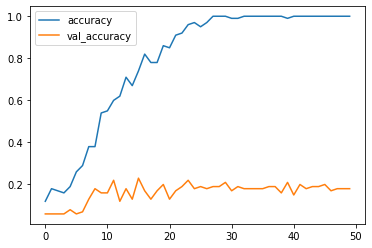

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [ ]:
!ls -lh model_checkpoint_best

total 184K
-rw-r--r-- 1 root root   77 Feb  8 00:53 checkpoint
-rw-r--r-- 1 root root 174K Feb  8 00:53 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb  8 00:53 checkpoint.index


In [73]:
model4=get_new_model()
model4.load_weights(checkpoint_best_path)
get_test_accuracy(model4,x_test,y_test)

accuracy= 0.5727999806404114


Saving entire Model

In [79]:
checkpoint_path='model_checkpoints2'
checkpoint_1=ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,save_freq='epoch',verbose=1)

In [80]:
model6=get_new_model()
model.fit(x=x_train,y=y_train,epochs=3,callbacks=[checkpoint_1])

Epoch 1/3
312/313 [============================>.] - ETA: 0s - loss: 1.2784 - accuracy: 0.5435
Epoch 1: saving model to model_checkpoints2


313/313 [==============================] - 13s 40ms/step - loss: 1.2782 - accuracy: 0.5436
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.2529 - accuracy: 0.5509
Epoch 2: saving model to model_checkpoints2


313/313 [==============================] - 12s 38ms/step - loss: 1.2529 - accuracy: 0.5510
Epoch 3/3
312/313 [============================>.] - ETA: 0s - loss: 1.2298 - accuracy: 0.5569
Epoch 3: saving model to model_checkpoints2


313/313 [==============================] - 14s 45ms/step - loss: 1.2297 - accuracy: 0.5568


In [81]:
!ls -lh model_checkpoints2

total 148K
drwxr-xr-x 2 root root 4.0K Feb  8 05:11 assets
-rw-r--r-- 1 root root  14K Feb  8 05:11 keras_metadata.pb
-rw-r--r-- 1 root root 123K Feb  8 05:11 saved_model.pb
drwxr-xr-x 2 root root 4.0K Feb  8 05:11 variables


In [82]:
!ls -lh model_checkpoints2/variables

total 184K
-rw-r--r-- 1 root root 179K Feb  8 05:11 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Feb  8 05:11 variables.index


In [83]:
get_test_accuracy(model,x_test,y_test)

accuracy= 0.5314000248908997


In [85]:
from tensorflow.keras.models import load_model
model6=load_model(checkpoint_path)
get_test_accuracy(model6,x_test,y_test)

accuracy= 0.5314000248908997


In [91]:
model6.save('my_model.h5')

In [92]:
!ls -lh my_model.h5

-rw-r--r-- 1 root root 78K Feb  8 05:19 my_model.h5


In [94]:
model7=load_model('my_model.h5')
get_test_accuracy(model7,x_test,y_test)

accuracy= 0.5314000248908997
